In [4]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [5]:
happy = pd.read_csv('happy.csv')
happy 
happy= happy.rename({'Country name':'Country_name'},axis='columns')
# happy_score = happy['Country name','Regional indicator',"Ladder score"]
# happy_score

In [63]:
smokers = pd.read_csv('smokers.csv')
smokers
smokers = smokers[smokers["TIME"]==2014]
smokers = smokers.reset_index(drop=True)
smokers.head()
smokers = smokers.rename({'Country name':'Country_name'},axis='columns')
smokers= smokers.rename({'Value':'Value_smokers'},axis='columns')
smokers_score = smokers[['Country_name',"Value_smokers"]]
# smokers_score

In [62]:
suicide = pd.read_csv('suicide.csv',header = None)
# suicide.head()
suicide = suicide.drop(index=[0],axis=0)
# print(suicide.head())
dt2 = suicide.rename(columns=suicide.iloc[0])
dt2

suicide = dt2.drop(dt2.index[0])
suicide = suicide.reset_index(drop = True)
suicide = suicide.rename({'Country':'Country_name'},axis='columns')
suicide = suicide.rename({'2016':'Value_suicide'},axis='columns')
suicide.head()
suicide_score = suicide[['Country_name','Value_suicide']]
# suicide_score

In [10]:
alchol = pd.read_csv('alchol.csv')
alchol
alchol= alchol.rename({'Country name':'Country_name'},axis='columns')
alchol= alchol.rename({'Value_alchol':'Value_alchol'},axis='columns')
alchol_score = alchol[['Country_name',"Value_alchol"]]
# alchol_score


In [95]:
depression = pd.read_csv('depression.csv')
depression
depression= depression.rename({'Country name ':'Country_name'},axis='columns')
depression= depression.rename({'depression':'Value_depression'},axis='columns')
depression_score = depression
# depression_score = depression
# depression_score



In [102]:
timeuse = pd.read_csv('timeuse.csv')
timeuse

timeuse.dtypes
timeuse.keys()
timeuse = timeuse.rename({'Country':'Country_name'},axis='columns')
timeuse

,Country_name,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
0,Australia,25.017373,29.020153,512.355803,89.061849,6.004170,19.013204,40.006949
1,Austria,29.363549,20.732446,498.291623,78.836406,9.431552,32.078530,81.770630
2,Belgium,26.357791,28.595906,512.860239,98.516408,15.365886,21.016577,50.476242
3,Canada,28.790462,24.095448,520.000000,64.819713,5.605865,20.998791,53.476652
4,Denmark,23.050637,26.030903,488.607524,119.153410,7.439385,22.115072,81.371521
5,Estonia,29.423589,23.959773,530.015279,78.996207,7.861110,27.474674,37.624863
6,Finland,20.771330,26.156200,508.261100,80.645830,7.714292,37.230850,54.645980
7,France,22.930911,22.105101,512.974630,132.757108,14.842221,11.961101,55.201073
8,Germany,28.380100,32.090467,498.381500,94.963150,13.528252,26.435250,60.646950
9,Greece,24.650340,16.354267,500.032935,127.534109,5.086178,27.687648,56.327788


In [39]:
from scipy.stats import shapiro 
#정규성 문제 확인 
number  = shapiro(smokers_score["Value_smokers"])
number

# pvalue=0.4825419485569  > 0.05 보다 크므로 정규성에 문제가 없다.


(0.97971510887146, 0.817926824092865)

In [ ]:
# pd.merge(happy,smokers_score,suicide_score)

total_1 = pd.merge(happy,suicide_score)
total_1['Value_suicide'] = pd.to_numeric(total_1['Value_suicide'])
# total_1


In [45]:
total_2 = pd.merge(happy,alchol_score)
total_2['Value_alchol'] = pd.to_numeric(total_2['Value_alchol'])
# total_2

In [46]:
total_3 = pd.merge(happy,smokers_score)
total_3['Value_smokers'] = pd.to_numeric(total_3['Value_smokers'])
# total_3

In [47]:
total_4= pd.merge(happy,depression_score,on="Country_name")
total_4['Value_depression'] = pd.to_numeric(total_4['Value_depression'])

In [103]:
total_5= pd.merge(suicide_score,depression_score,on="Country_name")
total_5['Value_depression'] = pd.to_numeric(total_5['Value_depression'])
total_5['Value_suicide'] = pd.to_numeric(total_5['Value_suicide'])


In [105]:
total_6 = pd.merge(happy,timeuse,on='Country_name')
total_6

,Country_name,Regional indicator,Ladder score,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
0,Australia,North America and ANZ,7.2228,25.017373,29.020153,512.355803,89.061849,6.004170,19.013204,40.006949
1,Austria,Western Europe,7.2942,29.363549,20.732446,498.291623,78.836406,9.431552,32.078530,81.770630
2,Belgium,Western Europe,6.8635,26.357791,28.595906,512.860239,98.516408,15.365886,21.016577,50.476242
3,Canada,North America and ANZ,7.2321,28.790462,24.095448,520.000000,64.819713,5.605865,20.998791,53.476652
4,China,East Asia,5.1239,46.967384,19.986121,541.623872,99.930604,1.998612,22.984039,22.984039
5,Denmark,Western Europe,7.6456,23.050637,26.030903,488.607524,119.153410,7.439385,22.115072,81.371521
6,Estonia,Central and Eastern Europe,6.0218,29.423589,23.959773,530.015279,78.996207,7.861110,27.474674,37.624863
7,Finland,Western Europe,7.8087,20.771330,26.156200,508.261100,80.645830,7.714292,37.230850,54.645980
8,France,Western Europe,6.6638,22.930911,22.105101,512.974630,132.757108,14.842221,11.961101,55.201073
9,Germany,Western Europe,7.0758,28.380100,32.090467,498.381500,94.963150,13.528252,26.435250,60.646950


In [90]:
total_score = pd.merge(happy,suicide_score,on="Country_name",how='left')
total_score = pd.merge(total_score,alchol_score,on="Country_name",how='left')
total_score = pd.merge(total_score,smokers_score,on="Country_name",how='left')
total_score = pd.merge(total_score,depression_score,on="Country_name",how='left')

total_score['Value_suicide'] = pd.to_numeric(total_score['Value_suicide'])

total_score


,Country_name,Regional indicator,Ladder score,Value_suicide,Value_alchol,Value_smokers,Value_depression
0,Afghanistan,South Asia,2.5669,6.4,NaN,NaN,9.19
1,Albania,Central and Eastern Europe,4.8827,5.6,NaN,NaN,5.11
2,Algeria,Middle East and North Africa,5.0051,3.3,NaN,NaN,4.12
3,Argentina,Latin America and Caribbean,5.9747,9.1,NaN,NaN,10.61
4,Armenia,Commonwealth of Independent States,4.6768,5.7,NaN,NaN,8.26
5,Australia,North America and ANZ,7.2228,11.7,NaN,NaN,11.05
6,Austria,Western Europe,7.2942,11.4,12.2,24.3,11.20
7,Azerbaijan,Commonwealth of Independent States,5.1648,2.6,NaN,NaN,4.07
8,Bahrain,Middle East and North Africa,6.2273,5.7,NaN,NaN,4.23
9,Bangladesh,South Asia,4.8328,6.1,NaN,NaN,6.03


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'A group Histogram')

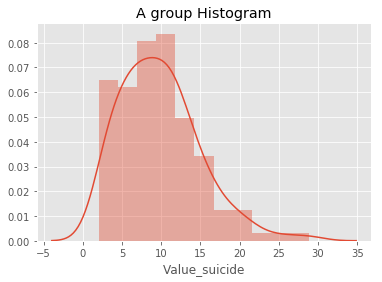

In [50]:
sns.distplot(total_1.Value_suicide)
plt.title('A group Histogram')
# plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


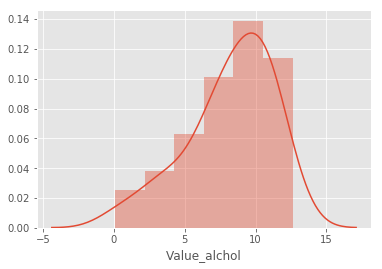

In [51]:
sns.distplot(total_2.Value_alchol)

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


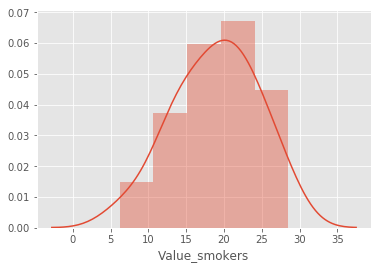

In [52]:
sns.distplot(total_3.Value_smokers)

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


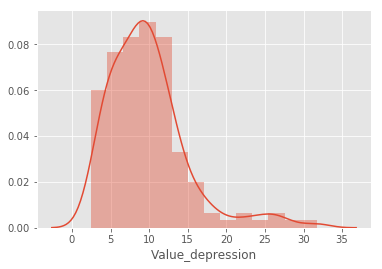

In [66]:
sns.distplot(total_4.Value_depression)

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


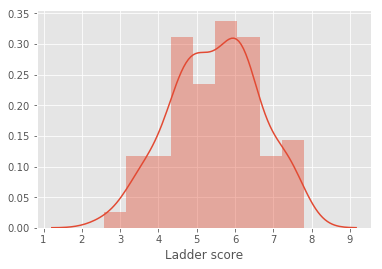

In [111]:
sns.distplot(total_1['Ladder score'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


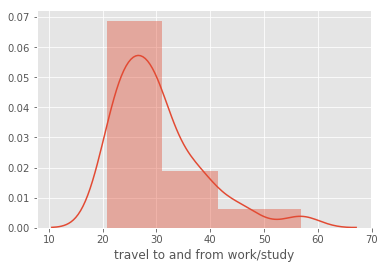

In [119]:
sns.distplot(total_6['travel to and from work/study'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


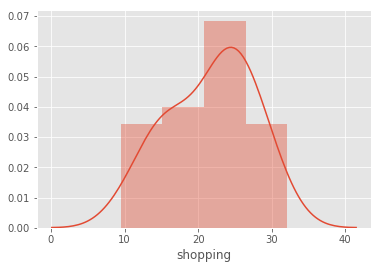

In [121]:
sns.distplot(total_6['shopping'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


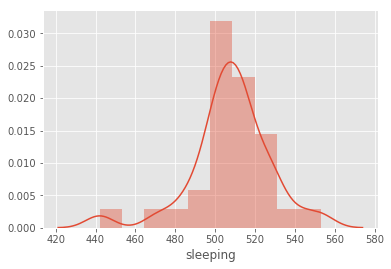

In [123]:
sns.distplot(total_6['sleeping'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


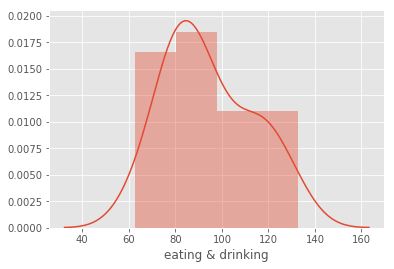

In [124]:
sns.distplot(total_6['eating & drinking'])

In [113]:
total_6.keys()

Index(['Country_name', 'Regional indicator', 'Ladder score',
       'travel to and from work/study', 'shopping', 'sleeping',
       'eating & drinking', 'participating / attending events', 'sports',
       'visiting or entertaining friends'],
      dtype='object')

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


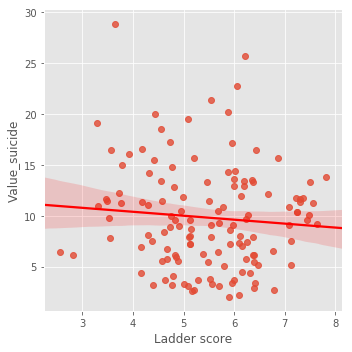

In [54]:
#자살률과 행복도의 관계
sns.lmplot(x="Ladder score", y="Value_suicide", data=total_1 , line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


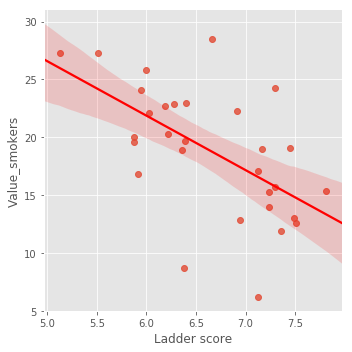

In [65]:
#행복도와 흡연과의 관계
sns.lmplot(x="Ladder score", y="Value_smokers", data=total_3, line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


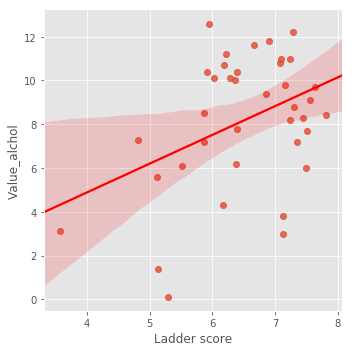

In [56]:
# 행복도과 음주소비와의 관계
sns.lmplot(x="Ladder score", y="Value_alchol", data=total_2 , line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


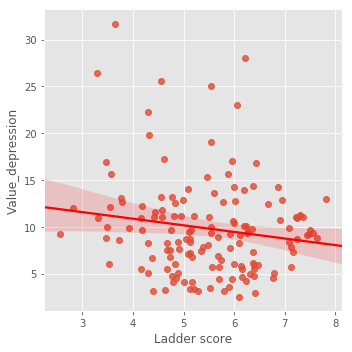

In [57]:
#행복도와 우울증의 상관관계 
sns.lmplot(x="Ladder score", y="Value_depression", data=total_4 , line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


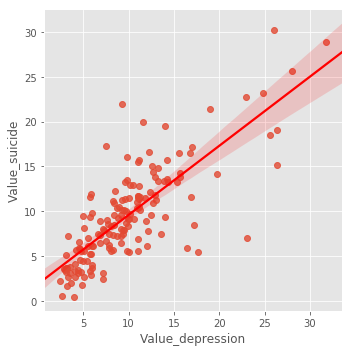

In [60]:
sns.lmplot(x="Value_depression", y="Value_suicide", data=total_5 , line_kws={'color':"red"})

In [61]:
total_5.corr()

,Value_suicide,Value_depression
Value_suicide,1.000000,0.786807
Value_depression,0.786807,1.000000


In [54]:
# 술먹으면 행복하고 담배하면 불행하고 , 사실 행복과 자살은 크게 관련이 없지만 음의 관계는 약간있을 수 있다.
# ?????????????????

In [87]:
# 대륙별 차이?를 확인해봐라 
total_score['Value_depression'].head()

0     9.19
1     5.11
2     4.12
3    10.61
4     8.26
Name: Value_depression, dtype: float64

In [91]:
total_score.corr()

,Ladder score,Value_suicide,Value_alchol,Value_smokers,Value_depression
Ladder score,1.000000,-0.086884,0.398364,-0.581007,-0.153984
Value_suicide,-0.086884,1.000000,0.455186,0.117594,0.850419
Value_alchol,0.398364,0.455186,1.000000,0.343439,0.470063
Value_smokers,-0.581007,0.117594,0.343439,1.000000,0.082709
Value_depression,-0.153984,0.850419,0.470063,0.082709,1.000000


In [93]:
total_score.cov()

,Ladder score,Value_suicide,Value_alchol,Value_smokers,Value_depression
Ladder score,1.237145,-0.504728,1.136598,-2.233982,-0.907105
Value_suicide,-0.504728,25.972033,6.394476,3.216880,21.852426
Value_alchol,1.136598,6.394476,9.404246,5.277222,6.826049
Value_smokers,-2.233982,3.216880,5.277222,31.117989,2.297429
Value_depression,-0.907105,21.852426,6.826049,2.297429,26.991164


In [108]:
timeuse.keys()

Index(['Country_name', 'travel to and from work/study', 'shopping', 'sleeping',
       'eating & drinking', 'participating / attending events', 'sports',
       'visiting or entertaining friends'],
      dtype='object')

In [110]:
# timeuse

In [107]:
total_6.corr()

,Ladder score,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
Ladder score,1.000000,-0.373837,0.743190,-0.261687,-0.116794,0.325630,0.499810,0.068342
travel to and from work/study,-0.373837,1.000000,-0.348938,-0.219024,0.017845,-0.300477,-0.145023,-0.356222
shopping,0.743190,-0.348938,1.000000,-0.200382,-0.048143,0.386427,0.393298,-0.091313
sleeping,-0.261687,-0.219024,-0.200382,1.000000,-0.216109,-0.239228,-0.140034,0.213359
eating & drinking,-0.116794,0.017845,-0.048143,-0.216109,1.000000,-0.065678,0.112951,0.007670
participating / attending events,0.325630,-0.300477,0.386427,-0.239228,-0.065678,1.000000,0.065191,0.006203
sports,0.499810,-0.145023,0.393298,-0.140034,0.112951,0.065191,1.000000,-0.044574
visiting or entertaining friends,0.068342,-0.356222,-0.091313,0.213359,0.007670,0.006203,-0.044574,1.000000


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


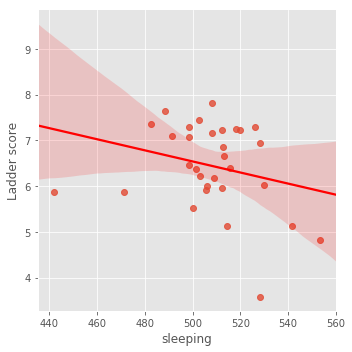

In [125]:
sns.lmplot(x="sleeping", y="Ladder score", data=total_6 , line_kws={'color':"red"})

In [126]:
timeuse

,Country_name,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
0,Australia,25.017373,29.020153,512.355803,89.061849,6.004170,19.013204,40.006949
1,Austria,29.363549,20.732446,498.291623,78.836406,9.431552,32.078530,81.770630
2,Belgium,26.357791,28.595906,512.860239,98.516408,15.365886,21.016577,50.476242
3,Canada,28.790462,24.095448,520.000000,64.819713,5.605865,20.998791,53.476652
4,Denmark,23.050637,26.030903,488.607524,119.153410,7.439385,22.115072,81.371521
5,Estonia,29.423589,23.959773,530.015279,78.996207,7.861110,27.474674,37.624863
6,Finland,20.771330,26.156200,508.261100,80.645830,7.714292,37.230850,54.645980
7,France,22.930911,22.105101,512.974630,132.757108,14.842221,11.961101,55.201073
8,Germany,28.380100,32.090467,498.381500,94.963150,13.528252,26.435250,60.646950
9,Greece,24.650340,16.354267,500.032935,127.534109,5.086178,27.687648,56.327788


In [127]:
508.110579/60

8.46850965

In [138]:
# timeuse['mltisleeping'] = (timeuse['sleeping']-510)


TypeError: Could not operate 510 with block values unsupported operand type(s) for -: 'str' and 'int'

In [137]:
timeuse.corr()

,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends,mltisleeping
travel to and from work/study,1.000000,-0.371517,-0.220999,-0.038648,-0.282321,-0.194949,-0.374062,-0.220999
shopping,-0.371517,1.000000,-0.180181,0.014907,0.366820,0.425200,-0.063461,-0.180181
sleeping,-0.220999,-0.180181,1.000000,-0.168695,-0.235616,-0.113851,0.207957,1.000000
eating & drinking,-0.038648,0.014907,-0.168695,1.000000,-0.079583,0.194999,0.042415,-0.168695
participating / attending events,-0.282321,0.366820,-0.235616,-0.079583,1.000000,0.042456,-0.003280,-0.235616
sports,-0.194949,0.425200,-0.113851,0.194999,0.042456,1.000000,0.003026,-0.113851
visiting or entertaining friends,-0.374062,-0.063461,0.207957,0.042415,-0.003280,0.003026,1.000000,0.207957
mltisleeping,-0.220999,-0.180181,1.000000,-0.168695,-0.235616,-0.113851,0.207957,1.000000
